In [2]:
import sys
sys.path.append("../")
import os
import matplotlib.pyplot as plt
import math
import library

# Question 1

In [3]:
matrix,_ = library.io.reader("./input1.txt")
matrix = library.matrix.matrix(matrix)

In [4]:
print(matrix)

 0.2	-5.0	 3.0	 0.4	 0.0	
-0.5	 1.0	 7.0	-2.0	 0.3	
 0.6	 2.0	-4.0	 3.0	 0.1	
 3.0	 0.8	 2.0	-0.4	 3.0	
 0.5	 3.0	 2.0	 0.4	 1.0	



In [5]:
matrix = library.linear.lu_decomposition.inverter(matrix)

In [25]:
print("The inverted matrix is ")
print(matrix)

The inverted matrix is 
-0.707949147806648	 2.5314333612741007	 2.4311958647666927	 0.9665758591785413	-3.9022771723945238	
-0.19343159169227891	 0.31014249790444265	 0.27946586569805326	 0.0577151438949427	-0.2941347676259662	
 0.021689019279128384	 0.3654652137468567	 0.2861483654652136	 0.05055532271584239	-0.2899203688181055	
 0.27341203315637475	-0.12992455993294275	 0.13161264785321758	-0.14101355127130483	 0.44885675700847544	
 0.7815264971593533	-2.875104777870915	-2.678937319549222	-0.7011385861972617	 4.233840923907981	



# Question 2

In [7]:
import numpy as np
def diffusion(N, dt, t0, tn):
    nl = N 
    nr = 0
    N_l = [nl]
    N_r = [0]
    t = [0]
    ti = 0
    rand = library.random.LGC(repeat=False)[-1]
    steps = int((tn-t0)/dt)
    for i in range(steps):
        check = nl/N
        for j in range(N):
            rand = library.random.LGC(x0 = rand)[0]
            if rand <= check:
                nl-=1
                nr+=1
                break
            else:
                nl+= 1
                nr-= 1
                break
        ti = ti+dt
        N_l.append(nl)
        N_r.append(nr)
        t.append(ti)
    plt.xlabel("Time")
    plt.ylabel("Number of Particles")
    plt.scatter(t,N_l,label="Left Particle",s=1.5)
    plt.scatter(t,N_r,label="Right Particle",s=1.5)
    plt.legend()
#     plt.savefig("output_Question2.pdf")
    return N_l, N_r, t

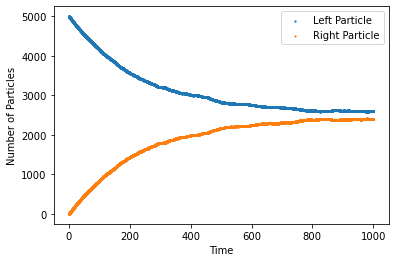

In [8]:
l,r,t = diffusion(5000,0.1,0,1000)

# Question3

In [9]:
F = 2.5
def force(x):
    return 2.5 - x*math.exp(x)
def force_p(x):
    return -math.exp(x) - x*math.exp(x)

In [10]:
root = library.root_finding.RootByNewtonRalphson(guess= 0,func=force,func_p=force_p, eps=1e-6)
print(f"The maximum stretch in the spring is {root} meter")

The maximum stretch in the spring is 0.958586356728703 meter


# Question 4

In [11]:
L = 1
theta_m = math.pi/4
a = math.sin(theta_m/2)
N = 10
g = 9.8
Lower_bound = 0
Upper_bound = math.pi/2
def func(phi):
    val = math.sqrt(1-(a**2)*math.sin(phi)**2)
    val = 1/val
    return val
T = 4*math.sqrt(L/g)*library.integrate(func, N, Lower_bound, Upper_bound, mode = "simpson")
print("The time period is ",T)

The time period is  2.087320017479592


# Question 5 

In [12]:
#First we will try to find the maximum height achieved by the particle without air resistance
#s_max_no_air_resistance = u^2/(2a)
#setting y_max to s_max_no_air_resistance
g = 10
y0 =0
v0 = 10
gamma = 0.02
u = 10
y_max = u**2/(2*g)
t0 = 0
tn = 1.5

In [13]:
print("The maximum height without resitance is",y_max)

The maximum height without resitance is 5.0


In [14]:
def dvdt(x,v,t):
    return  -gamma*v-g
def dxdt(v,t):
    return v

In [15]:
y,v,t =library.differential_equation.Solution_Runge_Kutta_4(dxdt=dxdt,dvdt=dvdt,init_value=(0,10), range_=(0,tn), h=0.01)

The maximum height with resitance 4.933825808845075


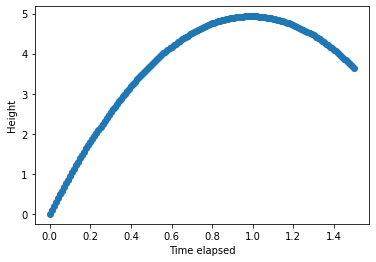

In [16]:
plt.scatter(t,y)
plt.xlabel("Time elapsed")
plt.ylabel("Height")
print("The maximum height with resitance",max(y))

The maximum height with resitance 4.933825808845075


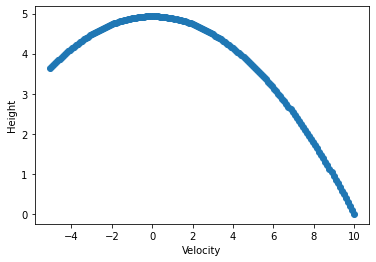

In [17]:
plt.scatter(v,y)
plt.xlabel("Velocity")
plt.ylabel("Height")
print("The maximum height with resitance",max(y))

# Question 6

In [18]:
a,_ = library.io.reader("./input6.txt")
a = library.matrix.matrix(a)

In [19]:
print(a)

 1.0	-2.0	 0.0	 5.0	
 0.0	 7.0	 1.0	 5.0	
 0.0	 4.0	 4.0	 0.0	
 0.0	 0.0	 0.0	 2.0	



In [20]:
guess = library.matrix.matrix([[1],[2],[3],[4]])
eigen_vector,eigen_value,iterations = library.Eigen_Value_Power_Iteration(guess=guess,matrix = a,eps = 1e-3,MAX_ITER = 10000)

In [21]:
print("The eigen value is ",eigen_value)
print("The eigen vector is\n",eigen_vector)
print("The number of iterations",iterations)

The eigen value is  8.000482069471927
The eigen vector is
 -0.1980437093255736	
 0.6931288137206476	
 0.693073687847661	
 1.3582370949350447e-07	

The number of iterations 10


# Question 7

In [22]:
x,y = library.io.read_sequential_data("./esem4fit.txt", separator="\t")

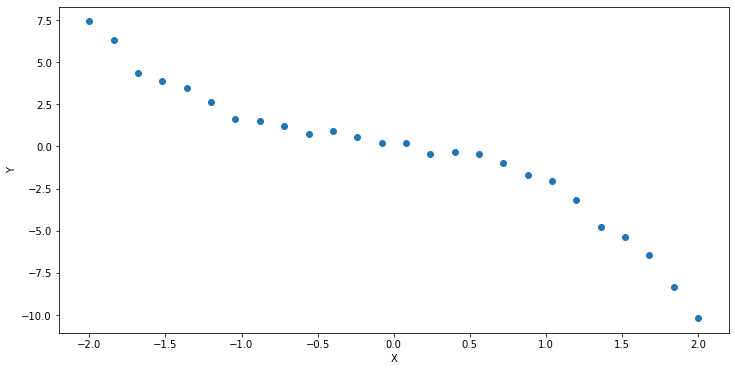

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(x,y)
coeff = library.fitting.poly_fit(x,y,order=4)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

The coefficients of the fit for x^0 is  0.2546295072115481
The coefficients of the fit for x^1 is  -1.1937592138092286
The coefficients of the fit for x^2 is  -0.4572554123829692
The coefficients of the fit for x^3 is  -0.8025653910658183
The coefficients of the fit for x^4 is  0.013239427477396606


Text(0, 0.5, 'Y')

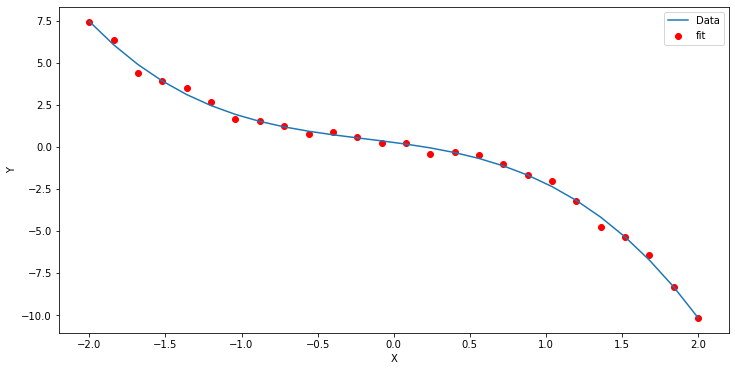

In [24]:
y_hat =[]
for x_ in x:
    y_hat.append((coeff[0]+
                  (x_**1)*coeff[1]+
                 (x_**2)*coeff[2]+
                 (x_**3)*coeff[3]+
                 (x_**4)*coeff[4]))
plt.figure(figsize=(12,6))
plt.plot(x,y_hat,label="Data")
plt.scatter(x,y, label="fit",c="red")
for i in range(len(coeff)):
    print(f"The coefficients of the fit for x^{i} is ",coeff[i])
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")